In [1]:
import torch
torch.set_grad_enabled(False) # REQUIRED

## 1. Generating the data

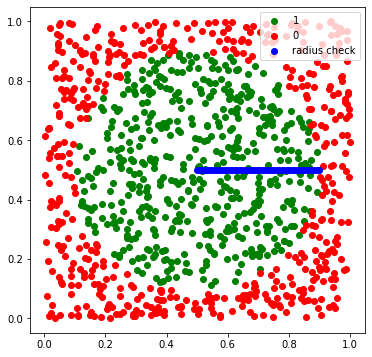

In [2]:
from utils import generate_dataset, show_dataset

X, y = generate_dataset()
show_dataset(X, y)

## using ReLU

In [3]:
from module import ReLU

r = ReLU()

r.forward(torch.tensor([-2, 0, 1, -0.4, 5]))

tensor([0., 0., 1., 0., 5.])

### Testing linear regression

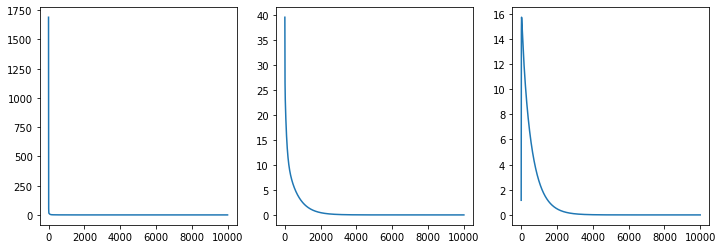

In [26]:
from module import Linear 
import matplotlib.pyplot as plt

n_samples = 40
input_dim = 5
output_dim = 3

x0 = torch.rand((n_samples, input_dim))


y = torch.rand((n_samples, output_dim))


W = 20*torch.rand((output_dim, input_dim))
b = torch.rand(output_dim)
y = torch.rand((n_samples, output_dim))
for i in range(n_samples):
    x = x0[i]
    y[i] = torch.mv(W, x) + b
    
ll = Linear(input_dim, output_dim)

losses, d_w, d_b = [], [], []

lr = 1e-3
nb_epochs = 10000

for epoch in range(nb_epochs):
    ll.zero_grad()
    for i in range(len(x0)):
        x1 = ll.forward(x0[i].unsqueeze(1))

        error = y[i].unsqueeze(1)- x1
        loss = torch.pow(error, 2).sum()

        grad_output = -2*error
        grad_input = ll.backward(grad_output)


    ll.W -= lr*ll.grad_W
    ll.b -= lr*ll.grad_b
    losses.append(loss.item())
    d_w.append(torch.norm(W-ll.W))
    d_b.append(torch.norm(b-ll.b.squeeze()))
    
f, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].plot(losses)
ax[1].plot(d_w)
ax[2].plot(d_b)

In [27]:
W, ll.W

(tensor([[15.9165,  2.9372,  3.0816, 15.8150,  7.8696],
         [ 5.8247,  1.4961, 16.7964,  2.0208, 12.7328],
         [ 5.1183,  5.7522, 16.2481, 16.4960, 14.8207]]),
 tensor([[15.9165,  2.9371,  3.0815, 15.8149,  7.8696],
         [ 5.8246,  1.4961, 16.7962,  2.0208, 12.7328],
         [ 5.1182,  5.7521, 16.2479, 16.4958, 14.8206]]))

In [28]:
d_w[-1], d_b[-1]

(tensor(0.0004), tensor(0.0004))

In [35]:
M = torch.rand((4, 3))
v = torch.rand(3)
torch.mv(M, v)

tensor([0.6185, 0.9176, 0.6300, 1.0084])

In [38]:
torch.mv(M[0], v)

tensor([0.4388, 0.3029, 0.5306, 0.2603])

In [37]:
M = torch.rand((5, 4, 3))
v = torch.rand(3)
torch.matmul(M, v)

tensor([[0.4388, 0.3029, 0.5306, 0.2603],
        [0.4538, 0.5125, 0.1091, 0.3433],
        [0.2568, 0.5384, 0.3687, 0.2446],
        [0.6881, 0.3049, 0.2679, 0.5831],
        [0.4524, 0.3542, 0.5021, 0.0822]])